In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
from IPython.display import  display, HTML

import warnings
warnings.filterwarnings('ignore')

# 1. Introduction

Informations sur l'ensemble de données

Cet ensemble de données contient des informations sur les clients d'une entreprise de télécommunications fictive
Cette société fournit divers services tels que le streaming, le téléphone et les services Internet.

Informations sur les attributs

CustomerID : ID client unique pour chaque client

genre : si le client est un homme ou une femme

SeniorCitizen : Si le client est un senior ou non (1, 0)

Partenaire : Si le client a un partenaire ou non (Oui, Non)

Dépendant : Si le client a des personnes à charge ou non (Oui, Non)

tenure : Nombre de mois pendant lesquels le client a utilisé le service

PhoneService : si le client dispose d'un service téléphonique ou non (Oui, Non)

MultipeLines : Si le client a plusieurs lignes ou non (Oui, Non, Pas de service téléphonique)

InternetService : fournisseur de services Internet du client (DSL, fibre optique, non)

OnlineSecurity : si le client dispose ou non d'une sécurité en ligne (Oui, Non, Pas de service Internet)

OnlineBackup : Si le client dispose ou non d'une sauvegarde en ligne (Oui, Non, Pas de service Internet)

DeviceProtection : si le client dispose ou non d'une protection d'appareil (Oui, Non, Pas de service Internet)

TechSupport : Si le client dispose d'un support technique ou non (Oui, Non, Pas de service Internet)

StreamingTV : si le client dispose ou non de la télévision en streaming (oui, non, pas de service Internet)

StreamingMovies : si le client a des films en streaming ou non (Oui, Non, Pas de service Internet)

Contrat : la durée du contrat du client (mensuel, un an, deux ans)

PaperlessBilling : facturation sans papiers (oui,non)

PaymentMethod : Mode de paiement du client (Chèque électronique, Chèque postal, Virement bancaire (automatique), Carte de crédit (automatique))

Ancienneté : nombre de mois pendant lesquels le client est resté dans l'entreprise

MonthlyCharges : Le montant facturé au client mensuellement

TotalCharges : le montant total facturé au client

Churn : si le client s'est désabonné ou non (oui ou non)


# 2.préparation des données

In [3]:
data=pd.read_csv('https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
print(f"nombre des Lignes : {data.shape[0]}")
print(f"nombre des Colonnes  : {data.shape[1]}")

nombre des Lignes : 7043
nombre des Colonnes  : 21


In [5]:
print(f"data Features :\n {data.columns.values}")

data Features :
 ['customerID' 'gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure'
 'PhoneService' 'MultipleLines' 'InternetService' 'OnlineSecurity'
 'OnlineBackup' 'DeviceProtection' 'TechSupport' 'StreamingTV'
 'StreamingMovies' 'Contract' 'PaperlessBilling' 'PaymentMethod'
 'MonthlyCharges' 'TotalCharges' 'Churn']


In [6]:
print(f"data type columns :\n\n {data.dtypes}")

data type columns :

 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


normalement la colonne "TotalCharges" de type numerique pas catégoriel qui n'est pas le cas.

donc prochaine étape on vas convertir la colonne "TotalCharges" a type numérique .

In [7]:
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

on a le nombres des clients sont égaux à le nombres des lignes des données .

donc il existe un client unique chaque lignes dans mes données et que 0.16% des clients qui ont des valeure manquant dans l’attribut 'TotalCharges'.



alors on vas supprimer la colonne 'customerID'car il  n'importe aucune information et on vas supprimer les client qui ont des valeure manquantes dans notre données car le pourcentage des clients qui ont des valeures manquantes
par rapport à l'ensemble de données total est très faible.

In [8]:
data.dropna(how = 'any', inplace = True)
data.drop("customerID", inplace = True,axis=1) 

j'ai supprimé les valeurs manquantes et la colonnes "customerID" .

In [9]:
print(f'Nombre de valeurs doubles :\t{data.duplicated().sum()}')

Nombre de valeurs doubles :	22


Cet ensemble de données ne contient aucune valeur en double. C'est bon signe.

In [10]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


on trouve que les collones 'MonthlyCharges' et 'TotalCharges' a un grand ecart entre la valeure minimale et maximale .

Standardisation signifie généralement que les données sont remises à l'échelle pour avoir une moyenne de 0 et un écart type de 1 (loi normale).

c'est bient que la distribution de notre données suive la loi normale.

car La loi normale est remarquable par le fait qu'elle décrit une grande partie des phénomènes naturels.
 

In [11]:
data.describe(include=['object']).T.unique

gender              2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
Churn               2
Name: unique, dtype: object

In [12]:
'''labels=['1 - 12','13 - 24','15 - 36','37 - 48','49 - 60','> 61']
data['TenureGroup']=pd.qcut(data.tenure, 6, labels=labels,precision = 6)'''
l=[]
for i in data.index:
    if data.tenure[i]<=12:
        l.append('1 - 12')
    elif data.tenure[i]<=24 and data.tenure[i]>12:
        l.append('13 - 24')
    elif data.tenure[i]<=36 and data.tenure[i]>14:
        l.append('15 - 36')
    elif data.tenure[i]<=48 and data.tenure[i]>36:
        l.append('37 - 48')
    elif data.tenure[i]<=60 and data.tenure[i]>48:
        l.append('49 - 60')
    else:
        l.append('> 61')

data['TenureGroup']= l

In [13]:
countTenureGroup= pd.DataFrame(data['TenureGroup'].value_counts())
countTenureGroup.columns = ['countTenureGroup']
countTenureGroup

,countTenureGroup
1 - 12,2175
> 61,1407
13 - 24,1024
15 - 36,832
49 - 60,832
37 - 48,762


# 3.Exploration des données

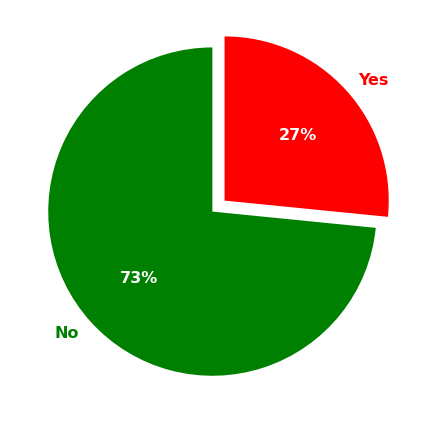

In [14]:
pie_data = data['Churn'].value_counts(normalize=True).values * 100
pie_label = data['Churn'].value_counts(normalize=True).index.to_list()

fig, ax = plt.subplots(figsize=(8,6))

wedges, texts, autotexts = ax.pie(pie_data, labels=pie_label,colors=['green','red'],
                                  startangle=90, explode=[0, 0.1],
                                  autopct='%.0f%%',
                                  textprops={'color':'w', 'fontsize':16, 'weight':'bold'})

for i, wedge in enumerate(wedges):
    texts[i].set_color(wedge.get_facecolor())

plt.tight_layout()
plt.show()

Comme on peut le voir, 27% des clients quittent les services. Techniquement parlant, cet ensemble de données est un ensemble de données déséquilibré, et C'est un problème de classification binaire.

In [15]:
import ipywidgets as widgets
"""def countplot(data,col):
    total=data.shape[0]
    ax = sns.countplot(x=col, data=data)
    for p in ax.patches:

        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()+p.get_height()*0.01
        ax.annotate(percentage, (x, y),ha='center')
    plt.show()"""

def countplot_hue(df,col) :

    plt.figure(figsize=(15,8))
    
    #1er graphe
    plt.subplot(1,2,1)
    grouped_df = df.groupby(col).size().reset_index(name="Count")
    l=list(grouped_df.Count)
    ax = sns.countplot(data=df, x=col, hue='Churn',palette=['green','red'])
    for p,i in zip( ax.patches,l+l):
        percentage = str((p.get_height()*100/i).round(2)) + '%'
        x = p.get_x() + p.get_width()/2
        y = p.get_height()+p.get_height()*0.01
        ax.annotate(percentage, (x, y),ha='center') 
    
    
    #2eme graph
    plt.subplot(1,2,2)
    total=data.shape[0]
    ax = sns.countplot(x=col, data=data,palette='Paired')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()+p.get_height()*0.01
        ax.annotate(percentage, (x, y),ha='center')
    plt.show()
    
K=['tenure', 'TotalCharges', 'MonthlyCharges']
data_copy = data.copy()
data_copy.drop(K, inplace = True,axis=1) 

display(widgets.interact(countplot_hue,df=widgets.fixed(data_copy),col=data_copy.columns.drop('Churn')))

interactive(children=(Dropdown(description='col', options=('gender', 'SeniorCitizen', 'Partner', 'Dependents',…

<function __main__.countplot_hue(df, col)>

1. gender :

le sexe n'est pas significative pour notre étude car ils disposent du même pourcentage .

2. SeniorCitizen :

Il y a une proportion plus élevée de désabonnement chez les clients plus jeunes (SeniorCitizen = Non), Les clients les plus âgés sont plus susceptibles de se désabonner . 

3. partner :

Les clients qui n'ont pas de partenaire sont plus susceptibles de se désabonner .

4. Dependents :

on Remarque que 70% des clients n'ont pas des personnes à charge et qu'ils sont plus susceptibles de se désabonner.

5. PhoneService:

Environ 90,3% des clients ont des services téléphoniques et ont un taux de désabonnement plus élevé.

6. MultiLines:

les client qui disposent de plusieurs lignes sont un peu plus susceptibles de se désabonner que les clients qui n'ont qu'une seule ligne.

7. InternetService:

Les clients qui ont la fibre optique comme service Internet sont plus susceptibles de se désabonner. Le service de fibre optique est beaucoup plus cher que le DSL, ce qui peut être l'une des raisons de désabonnement des clients.

8. OnlineSecurity , OnlineBackup , DeviceProtection ,TechSupport:

Les clients avec OnlineSecurity, OnlineBackup, DeviceProtection et TechSupport sont moins susceptibles de se désabonner car generalement ces clients sont des entreprises. 

9. streamingTV, streamingMovies:

streamingTV,streamingMovies ne sont pas significatives pour notre étude car ils sont réparti uniformément entre les options oui et non.

10. Contract:

plus le contrat est court, plus le taux de désabonnement est élevé.

11. paperlessBilling:

on remarque que 59% des clients utilisent la facturation sans papier. Le taux de désabonnement est plus élevé pour les clients qui ont opté pour la facturation sans papier.

12. PaymentMethod:

le type de paiement "chèques électroniques" est plus courant, Les clients qui paient avec cette methode sont plus susceptibles de se désabonner.

13. TenureGroup:

les clients qui utilisent les service mois d'un an sont les plus susceptibles de se désabonner, par contre les client dont l'utilisation du service dépasse 5 ans sans les plus fidèles .


In [16]:
K=[ 'tenure','TotalCharges', 'MonthlyCharges','Churn']
def kdeplot(data,col):
    Mth = sns.kdeplot(data[col][(data["Churn"] == 'No') ],color="green", shade = True)
    Mth = sns.kdeplot(data[col][(data["Churn"] == 'Yes') ],ax =Mth, color="red", shade= True)
    Mth.legend(["No","yes"],loc='upper right')
    Mth.set_ylabel('Density')
    Mth.set_xlabel(col)
    Mth.set_title(f'{col} par désabonnement')
    
display(widgets.interact(kdeplot,data=widgets.fixed(data[K]),col=data[K].columns.drop('Churn')))

interactive(children=(Dropdown(description='col', options=('tenure', 'TotalCharges', 'MonthlyCharges'), value=…

<function __main__.kdeplot(data, col)>

* dans le graphe tenure:  Ici il y a plus de désabonnement qui utilise le service entre 0 et 22 mois.
 

* dans le graphe MonthlyCharges:  Ici, il est évident que lorsque le taux de désabonnement est élevé, les frais sont élevés.


* dans le graphe TotalCharges:  Ici, nous obtenons l'idée surprenante que, comme nous pouvons le voir, il y a plus de désabonnement avec des charge totale inférieurs.

#### étiqueter les données

In [17]:
data.drop('TenureGroup',axis=1,inplace=True)

In [18]:
from sklearn.preprocessing import LabelEncoder

data.Churn = np.where(data.Churn == 'Yes',1,0)

le = LabelEncoder()
le_count = 0
columns=[]
for col in data.columns[1:]:
    if data[col].dtypes == 'O':
        
        le.fit(data[col])
        data[col] = le.transform(data[col])
        le_count += 1
        columns.append(col)
print(f'{le_count} columns were label encoded.')
print(f'les colonnes encoder: {columns}')


14 columns were label encoded.
les colonnes encoder: ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [19]:
data['gender'] = np.where(data.gender == 'Female',1,0)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,0,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,0,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,0,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,1,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


#### la correlation entre les attributs et la variable cible

Text(0.5, 1.0, 'Correlation with Churn Rate \n')

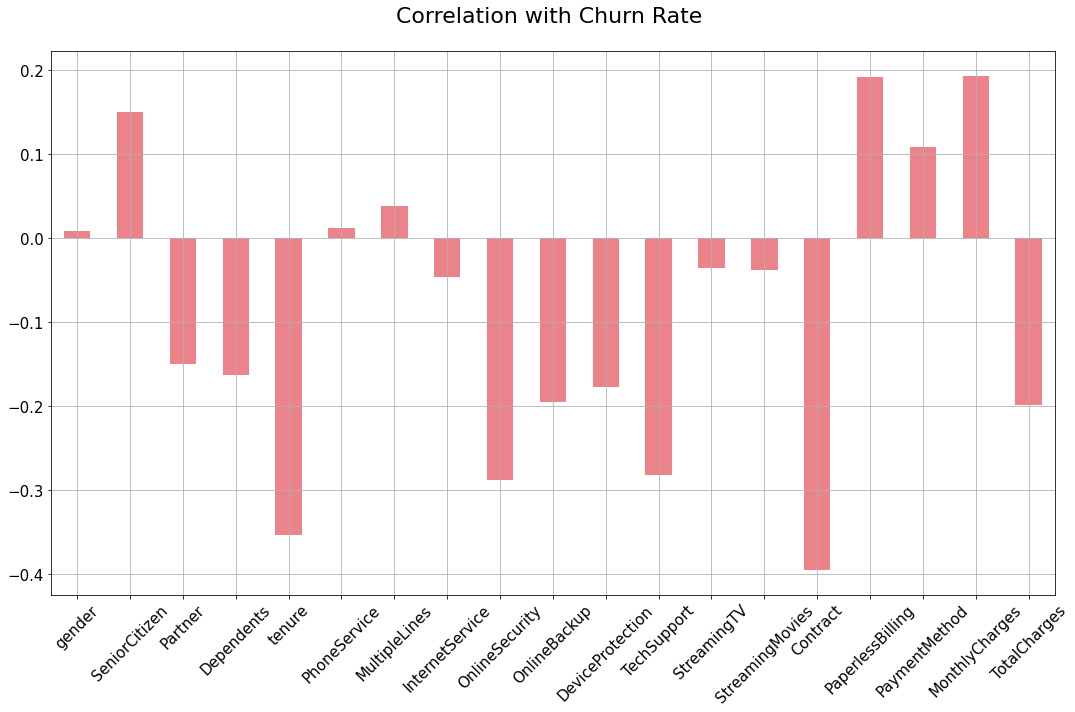

In [20]:
correlations = data.corrwith(data.Churn)
correlations = correlations[correlations!=1]

correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = '#ec838a',
        rot = 45, grid = True)
plt.title('Correlation with Churn Rate \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")


Eh bien, ici, nous pouvons voir l'association de chaque attribut avec la variable cible , qu'il s'agisse de conservation ou d'attrition.

Comme nous pouvons le voir, Contract, tenure et OnlineSecurity et TechSuppoert sont les 4 attributs qui ont la relation la plus forte avec le statut de désabonnement(Churn).

Pendant ce temps, gender, PhoneService MultipleLines, internetServices,StreaminTV et StreaminMovies sont les 6 attributs qui ont la relation la plus faible avec le statut de désabonnement (Churn).

Rappelez-vous toujours que "corrélation n'implique pas causalité". J'essaie simplement de comprendre la relation entre les attributs et la variable cible, pas la causalité entre eux.

car qu'un coefficient de corrélation de zéro ou proche de zéro ne signifie pas forcément qu'il n'existe pas de relation entre les variables.


#### la corrélation entre les attributs :

<AxesSubplot:>

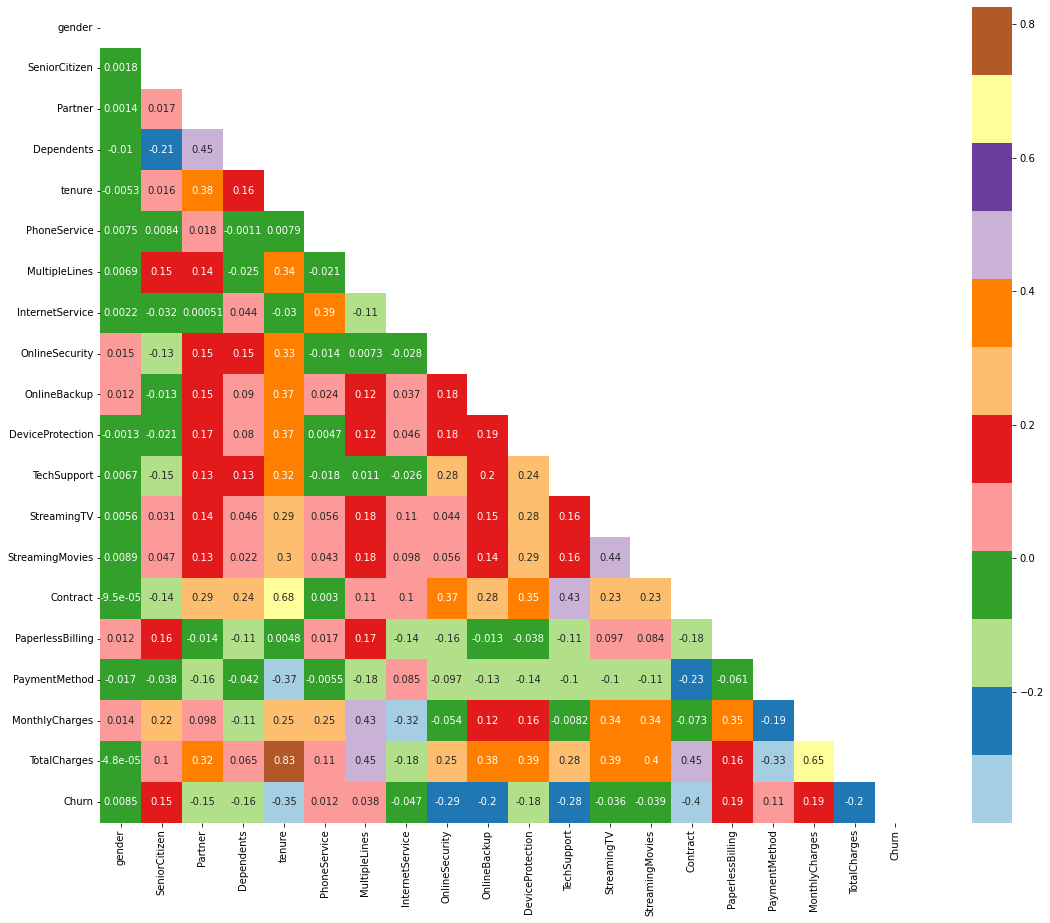

In [21]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True, square=True,cmap='Paired',mask=mask)

#### Vérifier la multicolinéarité à l'aide de VIF

Une méthode simple pour détecter la multicolinéarité dans un modèle consiste à utiliser quelque chose appelé lefacteur d'inflation de la varianceou laVIFpour chaque variable prédictive.


Le VIF mesure le rapport entre la variance pour un coefficient de régression donné avec uniquement cette variable dans le modèle et la variance pour un coefficient de régression donné avec toutes les variables du modèle.

Un VIF de 1 (le VIF minimum possible) signifie que le prédicteur testé n'est pas corrélé avec les autres prédicteurs. Un VIF de 1 (le VIF minimum possible) signifie que le prédicteur testé n'est pas corrélé avec les autres prédicteurs.

Plus le VIF est élevé,

Plus un prédicteur est corrélé avec les autres prédicteurs
Plus l'erreur standard est gonflée
Plus l'intervalle de confiance est grand
Moins il est probable qu'un coefficient soit évalué comme statistiquement significatif
Un VIF acceptable est s'il est inférieur au maximum de 10 et du modèle 1/1-R² (voir ci-dessous) :
   
<img src="vif_image.png">




In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

data2=data.drop('Churn',axis=1)

def suppression_var(col):

    if  set(col).issubset(set(data2.columns)):
        return calc_vif(data2.drop(list(col),axis=1))
    else:
        return calc_vif(data2)
        
coll =widgets.SelectMultiple(
    options=list(data2.columns)+["aucune"],
    value=["aucune"],
    description='Colonnes:',
    disabled=False
)

display(widgets.interact(suppression_var,df=widgets.fixed(data2),col=coll))      

interactive(children=(SelectMultiple(description='Colonnes:', index=(19,), options=('gender', 'SeniorCitizen',…

<function __main__.suppression_var(col)>

# 4.modelisation:

#### Distribution des données Numérique :

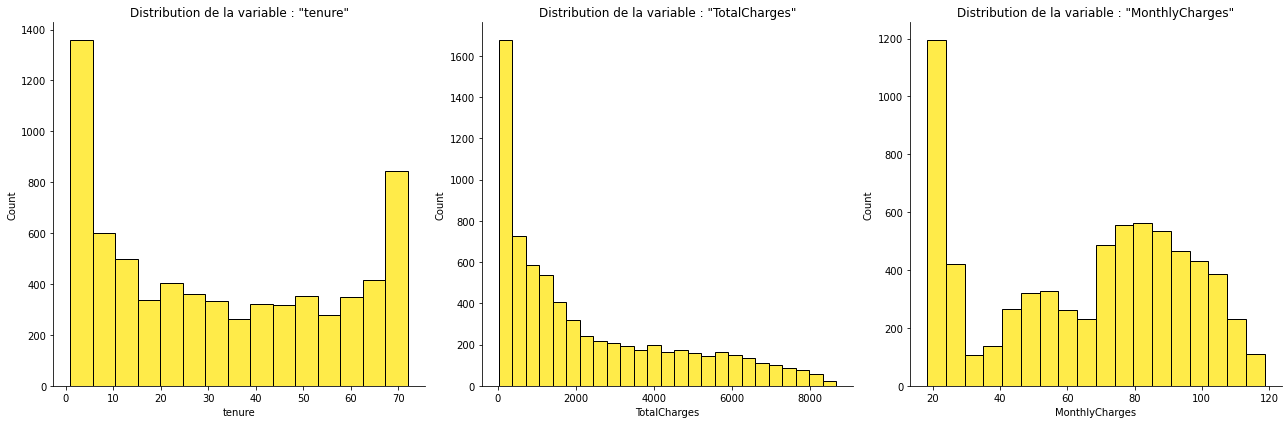

In [23]:
fig, ax = plt.subplots(1, 3, figsize=(18,6))
column_numerical=['tenure','TotalCharges', 'MonthlyCharges']
for i, col in enumerate(column_numerical):
    g=sns.histplot(data=data, x=col, multiple='stack', ax=ax[i], alpha=0.8,color='#FFE61B')
    g.set_title(f'Distribution de la variable : "{col}"')

plt.tight_layout()
sns.despine()
plt.show()

In [24]:
def boxplot(data,col ):
        sns.boxplot(data=data,x=col, orient="h", palette="YlOrBr_r")
        plt.show()
display(widgets.interact(boxplot,data=widgets.fixed(data),
                         col=["tenure","TotalCharges","MonthlyCharges"]) )     

interactive(children=(Dropdown(description='col', options=('tenure', 'TotalCharges', 'MonthlyCharges'), value=…

<function __main__.boxplot(data, col)>

en remarque qu'il existe pas des valeurs aberrantes dans les variable numérique "tenure", "TotalCharges" et "MonthlyCharges".

#### Standardisassions des données Numérique :

Étant donné que cet ensemble de données numerique ("tenure", "TotalCharges" et "MonthlyCharges") n'est pas en distribution normale et ils ont pas des valeurs aberrantes, j'utiliserai la Normalisation min-max pour les caractéristiques numériques.

In [25]:
from sklearn.preprocessing import MinMaxScaler
column_numerical=['MonthlyCharges','TotalCharges','tenure']
for i in column_numerical:
    scaler = MinMaxScaler()
    scaler.fit(data[[i]])

    data[[i]] = scaler.transform(data[[i]])

#### Équilibrer les données 

SMOTE (technique de suréchantillonnage minoritaire synthétique) est l'une des méthodes de suréchantillonnage les plus couramment utilisées pour résoudre le problème de déséquilibre.

Plus d'informations sur le fonctionnement de l'algorithme SMOTE !

Étape 1 : Définition de l'ensemble de classes minoritaires A , pour chaque $x \in A$, les k plus proches voisins de x sont obtenus en calculant la distance euclidienne entre x et tous les autres échantillons de l'ensemble A .

Etape 2 : Le taux d'échantillonnage N est réglé en fonction de la proportion déséquilibrée. Pour chaque $x \in A$, N exemples (c'est-à-dire x1, x2, …xn) sont choisis au hasard parmi ses k plus proches voisins, et ils construisent l'ensemble $A_1$.

Etape 3 : Pour chaque exemple $x_k \in A_1$(k=1, 2, 3…N), la formule suivante est utilisée pour générer un nouvel exemple :
$x' = x + rand(0, 1) * \mid x - x_k \mid$
dans laquelle rand(0, 1) représente le nombre aléatoire entre 0 et 1.

In [26]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 

data_X = data.drop('Churn', axis=1)
data_y = data['Churn']

smote = SMOTE(random_state=1)

X_smote, y_smote = smote.fit_resample(data_X, data_y)

X_train_smote_df = pd.DataFrame(X_smote, columns=data_X.columns)
y_train_smote_df = pd.DataFrame(y_smote, columns=['Churn'])

data_smote = pd.concat([X_train_smote_df, y_train_smote_df], axis=1)


In [27]:
sub_tab = [widgets.Output() for i in range(2)]
tab = widgets.Tab(sub_tab)
for i in range (2):

    with sub_tab[i]:
        if i ==0 :
            tab.set_title(i,"pie graph")
            pie_data = data_smote['Churn'].value_counts(normalize=True).values * 100
            pie_label = data_smote['Churn'].value_counts(normalize=True).index.to_list()

            fig, ax = plt.subplots(figsize=(8,6))

            wedges, texts, autotexts = ax.pie(pie_data, labels=pie_label,colors=['green','red'],
                                              startangle=90, explode=[0, 0.1],
                                              autopct='%.0f%%',
                                              textprops={'color':'w', 'fontsize':16, 'weight':'bold'})

            for i, wedge in enumerate(wedges):
                texts[i].set_color(wedge.get_facecolor())

            plt.tight_layout()
            plt.show()
        else:
            tab.set_title(i,"description data_smote")
            print(f"nombre des Lignes : {data_smote.shape[0]}")
            print(f"nombre des Colonnes  : {data_smote.shape[1]}\n")
            print("***------------------------------------***")
            print("\n nombre des clients churn et non churn :")
            print(data_smote['Churn'].value_counts())
display(tab)


#### Générer des ensembles de données d'entraînement et de test :

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3,
                                                    random_state=1, stratify=y_smote)
print('+-----------------training-----------------+')
print("Dimensions de X_train dataset : ", X_train.shape) 
print("Dimensions de y_train dataset : ", y_train.shape) 
print()
print('+-----------------testing------------------+')
print("Dimensions de X_test dataset : ", X_test.shape) 
print("Dimensions de y_test dataset : ", y_test.shape) 

+-----------------training-----------------+
Dimensions de X_train dataset :  (7228, 19)
Dimensions de y_train dataset :  (7228,)

+-----------------testing------------------+
Dimensions de X_test dataset :  (3098, 19)
Dimensions de y_test dataset :  (3098,)


on regle les dimention de y_train et y_test dataset.

In [29]:
y_train=y_train.values.reshape((y_train.shape[0], 1))
y_test=y_test.values.reshape((y_test.shape[0], 1))

In [30]:
print("Dimensions de y_train dataset : ", y_train.shape) 
print("Dimensions de y_test dataset : ", y_test.shape) 

Dimensions de y_train dataset :  (7228, 1)
Dimensions de y_test dataset :  (3098, 1)


In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
import sklearn as sk

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
model_list = {
    'Random Forest':RandomForestClassifier(random_state=1,criterion= 'entropy', n_estimators= 68),
    'XGBoost':XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss'),
}



In [33]:
y_pred_list = dict()
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}
col=['Model','Accuracy_mean','Accuracy_std', 'Precision_mean','Precision_std',
     'Recall_mean','Recall_std','F1 Score_mean','F1 Score_std', 'roc_auc_mean','roc_auc_std']
model_results = pd.DataFrame(columns=col)
i = 0


for name, model in model_list.items():
    model.fit(X_train, y_train)
    y_pred_list[name] = model.predict(X_test)
    KFold =  sk.model_selection.KFold(n_splits=3,shuffle=False)
    accuracy = cross_val_score(model, X_train, y_train, cv=KFold, scoring=scoring['accuracy'])
    precision = cross_val_score(model, X_train, y_train, cv=KFold, scoring=scoring['precision'])
    recall =cross_val_score(model, X_train, y_train, cv=KFold, scoring=scoring['recall']) 
    f1_score =cross_val_score(model, X_train, y_train, cv=KFold, scoring=scoring['f1_score'])
    auc_results = cross_val_score(model, X_train, y_train, cv=KFold, scoring='roc_auc')
    model_results.loc[i] = [name,
                         round(np.mean(accuracy)*100, 2),
                         round(np.std(accuracy)*100, 2),
                         round(np.mean(precision)*100, 2),
                         round(np.std(precision)*100, 2),
                         round(np.mean(recall)*100, 2),
                         round(np.std(recall)*100, 2),
                         round(np.mean(f1_score)*100, 2),
                         round(np.std(f1_score)*100, 2),
                         round(np.mean(auc_results)*100, 2),
                         round(np.std(auc_results)*100, 2)
                         ]
    i += 1


In [34]:
model_results.index=model_results.Model
model_results.drop("Model",axis=1,inplace=True)

In [35]:
model_results.style.background_gradient(axis=0)

,Accuracy_mean,Accuracy_std,Precision_mean,Precision_std,Recall_mean,Recall_std,F1 Score_mean,F1 Score_std,roc_auc_mean,roc_auc_std
Model,,,,,,,,,,
Random Forest,81.530000,0.800000,79.460000,1.140000,85.050000,0.630000,82.160000,0.800000,89.200000,0.370000
XGBoost,81.530000,0.640000,80.030000,1.060000,84.060000,0.630000,81.990000,0.510000,89.820000,0.170000


##### random forest:

    Accuracy : 81.28 (+/- 1)
    Precision:79.4 (+/- 1.19)
    Recall:84.47 (+/- 1.38)
    F1_score:81.85 (+/- 1.1)
    roc_auc:89.42 (+/- 0.35)
    
##### XGBoost:

    Accuracy :81.53 (+/- 0.64)
    Precision:80.03 (+/- 1.06)
    Recall:84.06 (+/- 0.63 )
    F1_score:81.99 (+/- 0.51)
    roc_auc:89.82 (+/- 0.17)

In [36]:
from sklearn.model_selection import GridSearchCV


#### Identifier le nombre optimal d'arbres pour le modèle Random Forest:

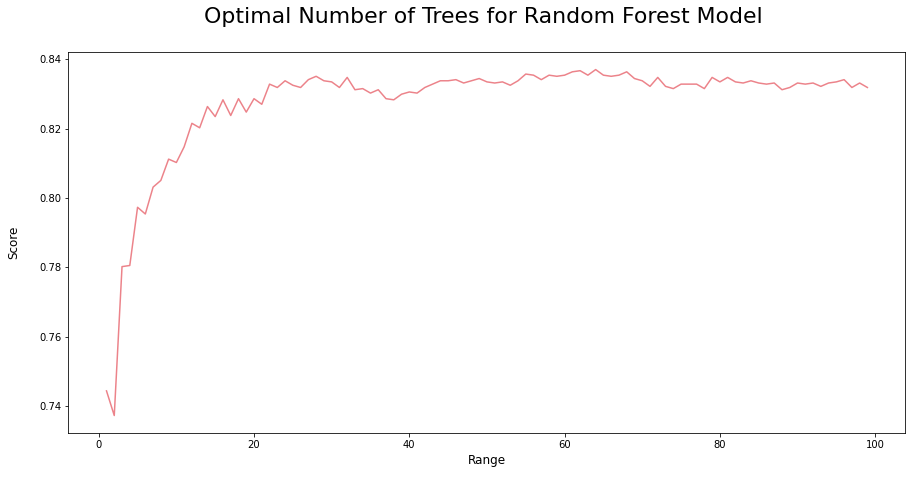

In [37]:
score_array = []
for each in range(1,100):
    rf_loop = RandomForestClassifier(
n_estimators = each, random_state = 1) 
    rf_loop.fit(X_train,y_train)
    score_array.append(rf_loop.score(X_test,y_test))
fig = plt.figure(figsize=(15, 7))

plt.plot(range(1,100),score_array, color = '#ec838a')

plt.ylabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.xlabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Optimal Number of Trees for Random Forest Model \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

Comme nous avons pu le voir à partir des itérations ci-dessus, le modèle randomforest atteindrait le score de précision le plus élevé lorsque ses n_estimators Varier entre 60 et 70.

In [38]:
%%time
param_grid_RF = { 
    'n_estimators': range(60,70),
    'criterion' :['gini', 'entropy']
}
rf=RandomForestClassifier(random_state=1)
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid_RF, cv= 5)
CV_rf.fit(X_train, y_train)

CPU times: user 37.5 s, sys: 1.09 s, total: 38.6 s
Wall time: 38.9 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': range(60, 70)})

In [39]:
print('les paramètres optimaux sont : ',CV_rf.best_params_)

les paramètres optimaux sont :  {'criterion': 'entropy', 'n_estimators': 68}


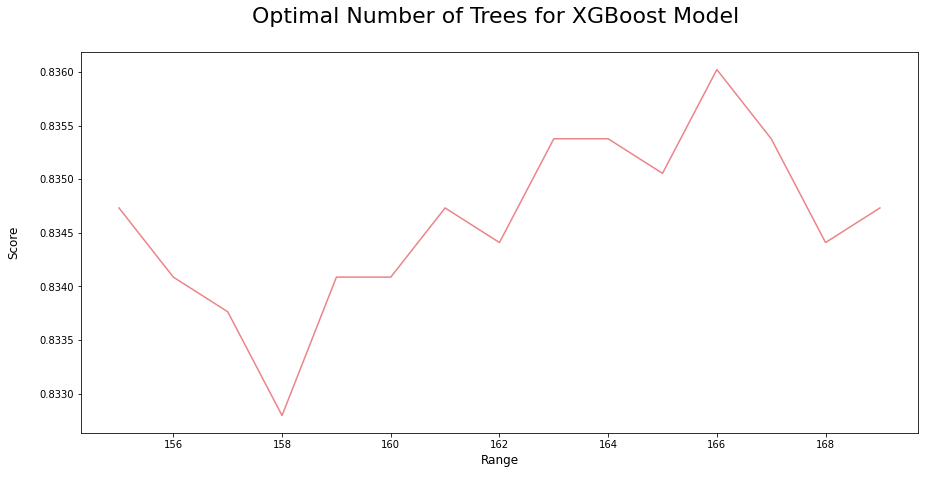

In [40]:
score_array = []
for each in range(155,170):
    rf_loop = XGBClassifier(n_estimators = each, random_state = 1) 
    rf_loop.fit(X_train,y_train)
    score_array.append(rf_loop.score(X_test,y_test))
fig = plt.figure(figsize=(15, 7))

plt.plot(range(155,170),score_array, color = '#ec838a')

plt.ylabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.xlabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Optimal Number of Trees for XGBoost Model \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

In [41]:
param_grid_XGB = {
    'n_estimators': range(166,170),
    'learning_rate':[.05,.1,.15,.2,.25,.3,.35,.4]
}
#learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
#param_grid = dict(learning_rate=learning_rate)

GB=XGBClassifier(random_state=1)
CV_GB = GridSearchCV(estimator=GB, param_grid=param_grid_XGB, cv= 5)
CV_GB.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=1, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3,
                                           0.35, 0.4],
                         'n_estimators': range(166, 170)})

In [42]:
print('les paramètres optimaux sont : ',CV_GB.best_params_)

les paramètres optimaux sont :  {'learning_rate': 0.3, 'n_estimators': 167}


In [43]:
model_list = {
    'Random Forest':RandomForestClassifier(random_state=1,criterion= 'entropy', n_estimators= 68),
    'XGBoost':XGBClassifier(n_estimators = 169,learning_rate= 0.3,random_state=1,
                            use_label_encoder=False, eval_metric='logloss'),
}

In [44]:
y_pred_list = dict()
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}
col=['Model','Accuracy_mean','Accuracy_std', 'Precision_mean','Precision_std',
     'Recall_mean','Recall_std','F1 Score_mean','F1 Score_std', 'roc_auc_mean','roc_auc_std']
model_results = pd.DataFrame(columns=col)
i = 0


for name, model in model_list.items():
    model.fit(X_train, y_train)
    y_pred_list[name] = model.predict(X_test)
    KFold =  sk.model_selection.KFold(n_splits=3,shuffle=False)
    accuracy = cross_val_score(model, X_train, y_train, cv=KFold, scoring=scoring['accuracy'])
    precision = cross_val_score(model, X_train, y_train, cv=KFold, scoring=scoring['precision'])
    recall =cross_val_score(model, X_train, y_train, cv=KFold, scoring=scoring['recall']) 
    f1_score =cross_val_score(model, X_train, y_train, cv=KFold, scoring=scoring['f1_score'])
    auc_results = cross_val_score(model, X_train, y_train, cv=KFold, scoring='roc_auc')
    model_results.loc[i] = [name,
                         round(np.mean(accuracy)*100, 2),
                         round(np.std(accuracy)*100, 2),
                         round(np.mean(precision)*100, 2),
                         round(np.std(precision)*100, 2),
                         round(np.mean(recall)*100, 2),
                         round(np.std(recall)*100, 2),
                         round(np.mean(f1_score)*100, 2),
                         round(np.std(f1_score)*100, 2),
                         round(np.mean(auc_results)*100, 2),
                         round(np.std(auc_results)*100, 2)
                         ]
    i += 1


In [45]:
model_results.index=model_results.Model
model_results.drop("Model",axis=1,inplace=True)

In [46]:
model_results.style.background_gradient(axis=0)

,Accuracy_mean,Accuracy_std,Precision_mean,Precision_std,Recall_mean,Recall_std,F1 Score_mean,F1 Score_std,roc_auc_mean,roc_auc_std
Model,,,,,,,,,,
Random Forest,81.530000,0.800000,79.460000,1.140000,85.050000,0.630000,82.160000,0.800000,89.200000,0.370000
XGBoost,81.310000,0.130000,80.120000,0.780000,83.310000,1.210000,81.670000,0.280000,89.880000,0.140000


In [47]:
sub_tab = [widgets.Output() for i in range(2)]
tab = widgets.Tab(sub_tab)
for i in range (2):

    with sub_tab[i]:
        
        if i ==0 :
            tab.set_title(i,"Random Forest")
            classifier=model_list['Random Forest']

            classifier.fit(X_train,y_train)
            feature_importances_RF=pd.DataFrame(classifier.feature_importances_,
                          index = X_train.columns, 
                          columns = ["importance"]).sort_values(
                 "importance", 
                 ascending = False)

            plt.figure(figsize=(20,9))
            ax = sns.barplot(x=feature_importances_RF.index,y='importance', data=feature_importances_RF,
                             palette='Paired')
            ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

            plt.show()

        else:
            tab.set_title(i,"XGBoost")
            classifier=model_list['XGBoost']
            d=classifier.get_booster().get_score(importance_type = 'gain')

            index=[]
            val=[]
            for k,v in d.items():
                index.append(k)
                val.append(v)
            feature_importances_GB = pd.DataFrame(val,columns = ["importance"],index=index).sort_values(
                 "importance", 
                 ascending = False)

            plt.figure(figsize=(20,9))
            ax = sns.barplot(x=feature_importances_GB.index,y='importance', data=feature_importances_GB,
                             palette='Paired')
            ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

            plt.show()

display(tab)
        

In [50]:
from sklearn.metrics import confusion_matrix

sub_tab = [widgets.Output() for i in range(2)]
tab = widgets.Tab(sub_tab)
for i in range (2):

    with sub_tab[i]:
        
        if i ==0 :
            tab.set_title(i,"Random Forest")
            classifier=model_list['Random Forest']
            y_pred = classifier.predict(X_test)
            cm = confusion_matrix(y_test, y_pred)

            df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
            plt.figure(figsize = (28,20))
            fig, ax = plt.subplots()
            sns.set(font_scale=1.4)
            sns.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
                       )
            class_names=[0,1]
            tick_marks = np.arange(len(class_names))
            plt.tight_layout()
            plt.title('Confusion matrix\n', y=1.1)
            plt.xticks(tick_marks, class_names)
            plt.yticks(tick_marks, class_names)
            ax.xaxis.set_label_position("top")
            plt.ylabel('Actual label\n')
            plt.xlabel('Predicted label\n')
            plt.show()

        else:
            tab.set_title(i,"XGBoost")
            classifier=model_list['XGBoost']
            y_pred = classifier.predict(X_test)
            cm = confusion_matrix(y_test, y_pred)

            df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
            plt.figure(figsize = (28,20))
            fig, ax = plt.subplots()
            sns.set(font_scale=1.4)
            sns.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
                       )
            class_names=[0,1]
            tick_marks = np.arange(len(class_names))
            plt.tight_layout()
            plt.title('Confusion matrix\n', y=1.1)
            plt.xticks(tick_marks, class_names)
            plt.yticks(tick_marks, class_names)
            ax.xaxis.set_label_position("top")
            plt.ylabel('Actual label\n')
            plt.xlabel('Predicted label\n')
            plt.show()
display(tab)
        

In [51]:
classifier=model_list['Random Forest']
y_pred = classifier.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)
FN = confusion[1][0]
TN = confusion[0][0]
TP = confusion[1][1]
FP = confusion[0][1]

In [52]:
sub_tab = [widgets.Output() for i in range(2)]
tab = widgets.Tab(sub_tab)
for i in range (2):

    with sub_tab[i]:
        
        if i ==0 :
            tab.set_title(i,"Random Forest")
            classifier=model_list['Random Forest']
            y_pred = classifier.predict(X_test)
            confusion = confusion_matrix(y_test, y_pred)
            FN = confusion[1][0]
            TN = confusion[0][0]
            TP = confusion[1][1]
            FP = confusion[0][1]
            plt.bar(['FN' , 'TN' , 'TP' , 'FP'],[FN,TN,TP,FP],color=['r','g','g','r'])
            plt.show()

        else:
            tab.set_title(i,"XGBoost")
            classifier=model_list['XGBoost']
            y_pred = classifier.predict(X_test)
            confusion = confusion_matrix(y_test, y_pred)
            FN = confusion[1][0]
            TN = confusion[0][0]
            TP = confusion[1][1]
            FP = confusion[0][1]
            ax=plt.bar(['FN' , 'TN' , 'TP' , 'FP'],[FN,TN,TP,FP],color=['r','g','g','r'])
            plt.show()
display(tab)
        

In [53]:
from sklearn import metrics
sub_tab = [widgets.Output() for i in range(2)]
tab = widgets.Tab(sub_tab)
for i in range (2):

    with sub_tab[i]:
        
        if i ==0 :
            tab.set_title(i,"Random Forest")
            classifier=model_list['Random Forest']
            y_pred = classifier.predict(X_test)
            print(metrics.classification_report(y_test, y_pred))
        else:
            tab.set_title(i,"XGBoost")
            classifier=model_list['XGBoost']
            y_pred = classifier.predict(X_test)
            print(metrics.classification_report(y_test, y_pred))
display(tab)

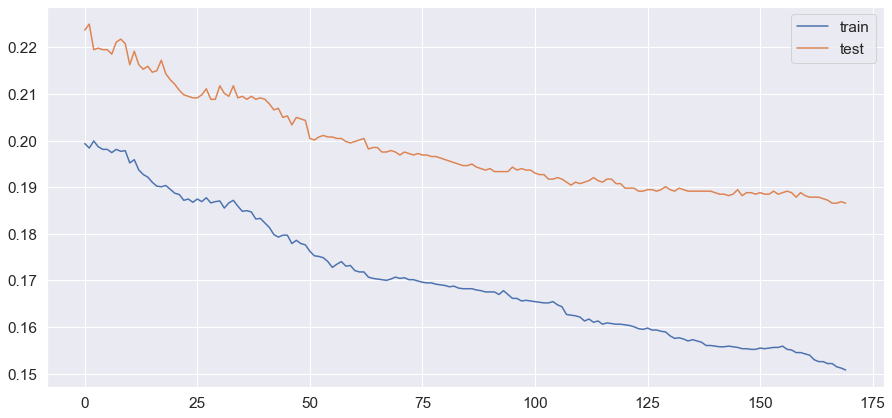

In [54]:
from sklearn.metrics import mean_squared_error
rf = XGBClassifier(n_estimators=1,learning_rate= 0.03,random_state=1,
                            use_label_encoder=False, eval_metric='logloss')

mse_train=[]
mse_test=[]
for iter in range(0,170):
    rf.fit(X_train, y_train)
    y_train_predicted = rf.predict(X_train)
    y_test_predicted = rf.predict(X_test)
    mse_train1 = mean_squared_error(y_train, y_train_predicted)
    mse_test1 = mean_squared_error(y_test, y_test_predicted)
    mse_train.append(mse_train1)
    mse_test.append(mse_test1)
    rf.n_estimators += 1
    
fig = plt.figure(figsize=(15, 7))

plt.plot(range(0,170),mse_train,label="train")
plt.plot(range(0,170),mse_test,label="test")
plt.legend()
plt.show()

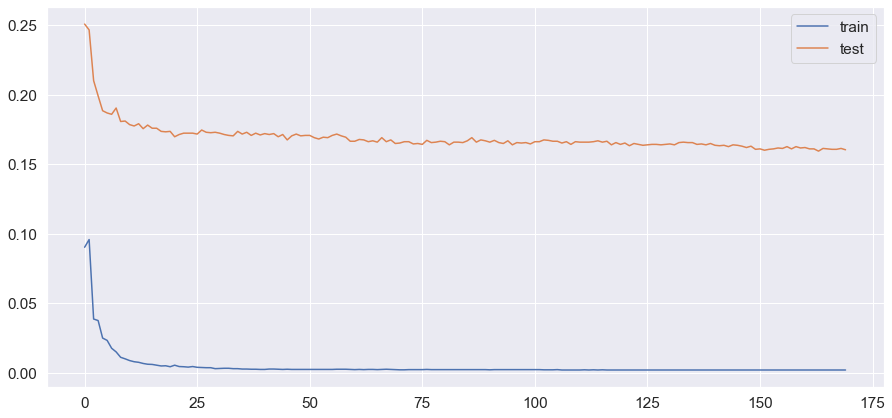

In [55]:
from sklearn.metrics import mean_squared_error
rf =    RandomForestClassifier(n_estimators=1,random_state=1,criterion= 'entropy')

mse_train=[]
mse_test=[]
for iter in range(0,170):
    rf.fit(X_train, y_train)
    y_train_predicted = rf.predict(X_train)
    y_test_predicted = rf.predict(X_test)
    mse_train1 = mean_squared_error(y_train, y_train_predicted)
    mse_test1 = mean_squared_error(y_test, y_test_predicted)
    mse_train.append(mse_train1)
    mse_test.append(mse_test1)
    rf.n_estimators += 1
    
fig = plt.figure(figsize=(15, 7))

plt.plot(range(0,170),mse_train,label="train")
plt.plot(range(0,170),mse_test,label="test")
plt.legend()
plt.show()

In [56]:
# Provide the path to the yaml file relative to the working directory
display(HTML('''<style>
    .widget-label { min-width: 20ex !important; }
    .widget-text { min-width: 60ex !important; }
</style>'''))

#Toggle Code
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();

 } else {
 $('div.input').show();

 }
 code_show = !code_show
} 
//$( document ).ready(code_toggle);//commenting code disabling by default
</script>
<form action = "javascript:code_toggle()"><input type="submit" value="Toggle Raw Code"></form>''')